In [1]:
from torchcore.tools.get_statistics import get_garment_overlap_by_category, gen_garment_overlap_heatmap
import os

anno_path = os.path.expanduser('~/data/annotations/fashionpedia_instances_train.pkl')
part='train'
category_num=46
IoR_list = get_garment_overlap_by_category(anno_path, part, category_num,start_from_one=True,max_only=True, set_zero_ind_end=None)


In [2]:
from torchcore.tools.get_statistics import get_dataset_category_statics
cat_statics=get_dataset_category_statics(anno_path, part, names=None)

In [13]:
print(cat_statics)

{'1': 6161.0, '2': 16548.0, '3': 1494.0, '4': 1107.0, '5': 7833.0, '6': 719.0, '7': 12414.0, '8': 2756.0, '9': 5046.0, '10': 3124.0, '11': 18739.0, '12': 922.0, '13': 152.0, '14': 4855.0, '15': 2518.0, '16': 3468.0, '17': 1457.0, '18': 1385.0, '19': 3389.0, '20': 6850.0, '21': 112.0, '22': 4326.0, '23': 2582.0, '24': 46372.0, '25': 7217.0, '26': 1374.0, '27': 135.0, '28': 1226.0, '29': 10159.0, '30': 5972.0, '31': 874.0, '32': 59447.0, '33': 27174.0, '34': 34246.0, '35': 3299.0, '36': 7987.0, '37': 3529.0, '38': 5021.0, '39': 528.0, '40': 1367.0, '41': 588.0, '42': 274.0, '43': 4814.0, '44': 2407.0, '45': 926.0, '46': 335.0}


In [11]:
len(IoR_list[5][31])

28

In [3]:
from torchcore.tools.get_statistics import gen_garment_overlap_heatmap
#heat_mat = gen_garment_overlap_heatmap(IoR_list,category_num,thresh=0.5, mode='category_mean')
# how one garment (accessories) distribute in other garments
heat_mat_self_distribution = gen_garment_overlap_heatmap(IoR_list,category_num,thresh=0.999, mode='size', obj_num=list(cat_statics.values()))
# how one garment contain different garments (parts) 
heat_mat_contain_distribution = gen_garment_overlap_heatmap(IoR_list,category_num,thresh=0.999, mode='size_reverse', obj_num=list(cat_statics.values()))
#heat_mat = gen_garment_overlap_heatmap(IoR_list,category_num,thresh=0.999, mode='mean')

In [4]:
from torchcore.data.datasets.build import build_dataloader
from torchcore.util.config import Config
cfg_path = 'configs/fcos/fcos_resnet50_fpn_fashion_pedia.py'
#cfg_path = 'configs/fcos/fcos_resnet50_fpn_coco.py'
cfg = Config.fromfile(cfg_path)
cfg.dataloader_val.batch_size=1
val_dataset_loader = build_dataloader(cfg.dataloader_val,distributed=False)
json_path = os.path.expanduser('~/data/datasets/Fashionpedia/annotations/instances_attributes_val2020.json')

names = val_dataset_loader.dataset.get_coco_style_names(json_path, with_cat_id=True)

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


In [8]:
names[15] ='hair accessory'

In [6]:
names

{0: 'shirt, blouse',
 1: 'top, t-shirt, sweatshirt',
 2: 'sweater',
 3: 'cardigan',
 4: 'jacket',
 5: 'vest',
 6: 'pants',
 7: 'shorts',
 8: 'skirt',
 9: 'coat',
 10: 'dress',
 11: 'jumpsuit',
 12: 'cape',
 13: 'glasses',
 14: 'hat',
 15: 'headband, head covering, hair accessory',
 16: 'tie',
 17: 'glove',
 18: 'watch',
 19: 'belt',
 20: 'leg warmer',
 21: 'tights, stockings',
 22: 'sock',
 23: 'shoe',
 24: 'bag, wallet',
 25: 'scarf',
 26: 'umbrella',
 27: 'hood',
 28: 'collar',
 29: 'lapel',
 30: 'epaulette',
 31: 'sleeve',
 32: 'pocket',
 33: 'neckline',
 34: 'buckle',
 35: 'zipper',
 36: 'applique',
 37: 'bead',
 38: 'bow',
 39: 'flower',
 40: 'fringe',
 41: 'ribbon',
 42: 'rivet',
 43: 'ruffle',
 44: 'sequin',
 45: 'tassel'}

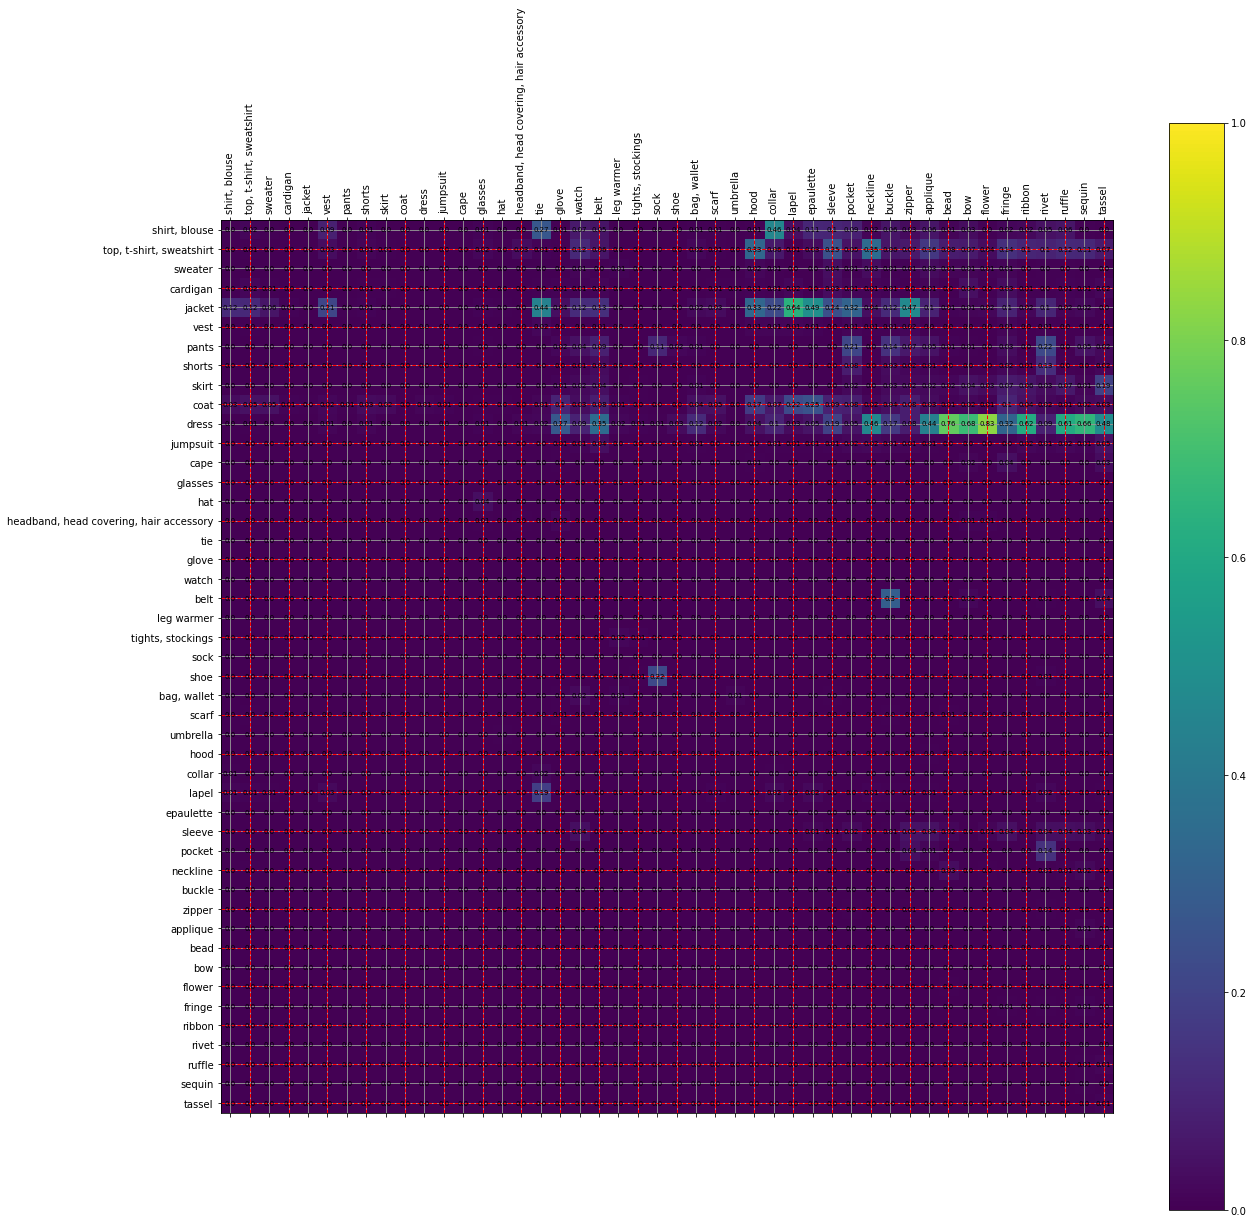

In [5]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
#ax.set_title('Garments self distribution')
cax = ax.matshow(heat_mat_self_distribution, interpolation='nearest', vmin=0, vmax=1)
for i in range(category_num):
    for j in range(category_num):
        text = ax.text(j, i, round(heat_mat_self_distribution[i, j],2),
                       ha="center", va="center", color=(0,0,0), size='x-small')
fig.colorbar(cax)

xaxis = np.arange(category_num)
yaxis = np.arange(category_num)
ax.set_xticks(xaxis)
ax.set_yticks(yaxis)
ax.set_xticklabels(list(names.values()), rotation=90)
ax.set_yticklabels(list(names.values()))

for xtick,ytick in zip(plt.xticks()[0],plt.yticks()[0]):
    if xtick % 2 == 0:
        plt.axvline(xtick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axvline(xtick, color='red', linestyle='--', linewidth=1, alpha=1)
    if ytick % 2 == 0:
        plt.axhline(ytick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axhline(ytick, color='red', linestyle='--', linewidth=1, alpha=1)

plt.grid()
plt.show()

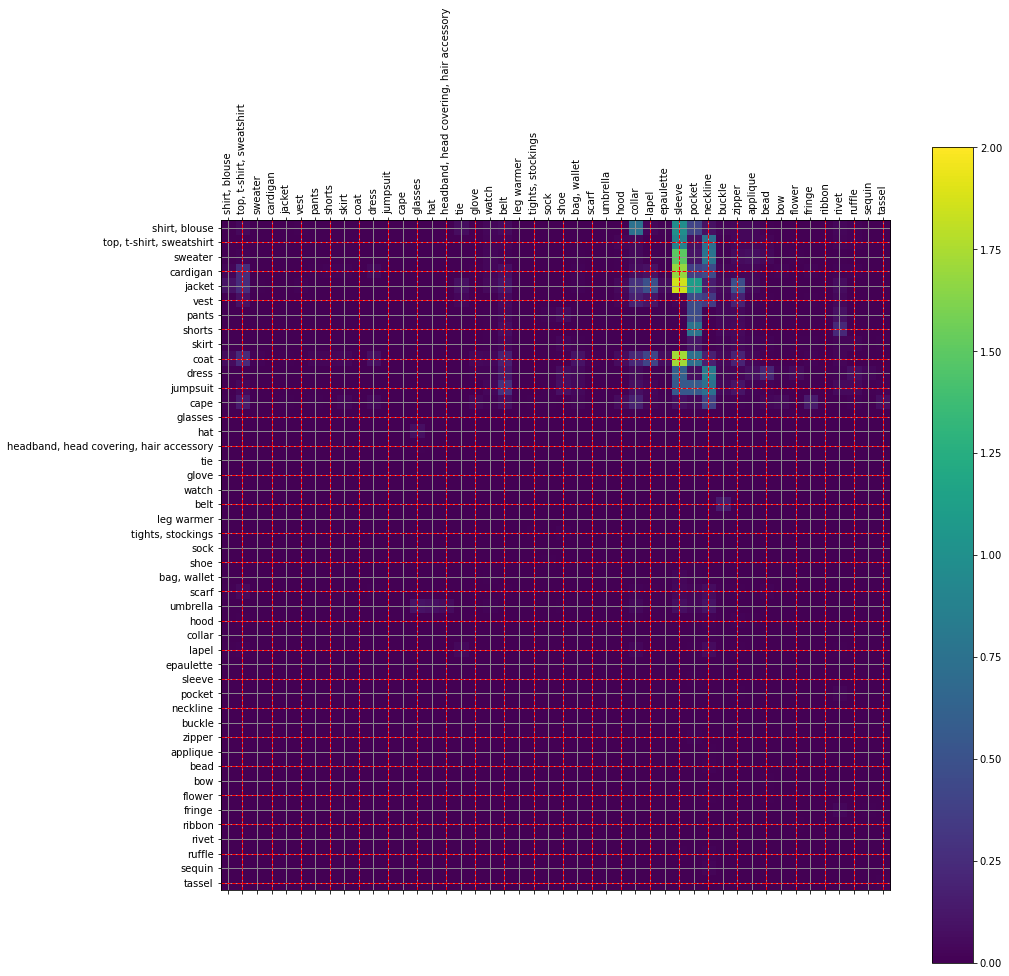

In [14]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
#ax.set_title('Garments contain parts distribution')
cax = ax.matshow(heat_mat_contain_distribution, interpolation='nearest', vmin=0, vmax=2)
fig.colorbar(cax)

xaxis = np.arange(category_num)
yaxis = np.arange(category_num)
ax.set_xticks(xaxis)
ax.set_yticks(yaxis)
ax.set_xticklabels(list(names.values()), rotation=90)
ax.set_yticklabels(list(names.values()))

for xtick,ytick in zip(plt.xticks()[0],plt.yticks()[0]):
    if xtick % 2 == 0:
        plt.axvline(xtick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axvline(xtick, color='red', linestyle='--', linewidth=1, alpha=1)
    if ytick % 2 == 0:
        plt.axhline(ytick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axhline(ytick, color='red', linestyle='--', linewidth=1, alpha=1)

plt.grid()
plt.show()

In [7]:
grammar1_reverse = np.where(heat_mat_self_distribution<0.01)
grammar1_reverse = [(i,j) for i,j in zip(grammar1_reverse[0],grammar1_reverse[1]) if i<=12 and j>=27]
grammar1_reverse_text = [(names[i],names[j]) for i,j in grammar1_reverse ]

In [11]:
print(grammar1_reverse)

[(0, 27), (0, 39), (0, 44), (0, 45), (1, 29), (2, 28), (2, 29), (2, 30), (2, 32), (2, 34), (2, 39), (2, 41), (2, 42), (2, 43), (2, 44), (2, 45), (3, 28), (3, 30), (3, 34), (3, 35), (3, 37), (3, 39), (3, 41), (3, 42), (3, 43), (3, 44), (4, 37), (4, 45), (5, 30), (5, 31), (5, 33), (5, 34), (5, 36), (5, 37), (5, 38), (5, 39), (5, 41), (5, 42), (5, 43), (5, 44), (5, 45), (6, 27), (6, 28), (6, 29), (6, 30), (6, 31), (6, 33), (6, 37), (6, 38), (6, 39), (6, 41), (6, 43), (7, 27), (7, 28), (7, 29), (7, 30), (7, 31), (7, 33), (7, 37), (7, 38), (7, 39), (7, 41), (7, 43), (7, 44), (8, 27), (8, 28), (8, 29), (8, 30), (8, 31), (8, 33), (9, 37), (9, 39), (9, 43), (11, 27), (11, 28), (11, 29), (11, 30), (11, 31), (11, 36), (11, 37), (11, 38), (11, 39), (11, 40), (11, 42), (11, 44), (12, 27), (12, 28), (12, 29), (12, 30), (12, 31), (12, 32), (12, 33), (12, 34), (12, 35), (12, 36), (12, 37), (12, 39), (12, 41), (12, 42), (12, 43), (12, 44)]


In [28]:
grammar1 = np.where(heat_mat_self_distribution>0.5)
grammar1 = [(i,j) for i,j in zip(grammar1[0],grammar1[1])]
grammar1_text = [(names[i],names[j]) for i,j in grammar1]

In [32]:
grammar1

[(4, 29), (10, 37), (10, 38), (10, 39), (10, 41), (10, 43), (10, 44)]

In [29]:
grammar1_text

[('jacket', 'lapel'),
 ('dress', 'bead'),
 ('dress', 'bow'),
 ('dress', 'flower'),
 ('dress', 'ribbon'),
 ('dress', 'ruffle'),
 ('dress', 'sequin')]

In [30]:
grammar2 = np.where(heat_mat_contain_distribution>0.5)
grammar2 = [(i,j) for i,j in zip(grammar2[0],grammar2[1])]
grammar2_text = [(names[i],names[j]) for i,j in grammar2]

In [33]:
grammar2

[(0, 28),
 (0, 31),
 (1, 31),
 (1, 33),
 (2, 31),
 (2, 33),
 (3, 31),
 (4, 31),
 (4, 32),
 (7, 32),
 (9, 31),
 (9, 32),
 (10, 31),
 (10, 33),
 (11, 31),
 (11, 32),
 (11, 33)]

In [31]:
grammar2_text

[('shirt, blouse', 'collar'),
 ('shirt, blouse', 'sleeve'),
 ('top, t-shirt, sweatshirt', 'sleeve'),
 ('top, t-shirt, sweatshirt', 'neckline'),
 ('sweater', 'sleeve'),
 ('sweater', 'neckline'),
 ('cardigan', 'sleeve'),
 ('jacket', 'sleeve'),
 ('jacket', 'pocket'),
 ('shorts', 'pocket'),
 ('coat', 'sleeve'),
 ('coat', 'pocket'),
 ('dress', 'sleeve'),
 ('dress', 'neckline'),
 ('jumpsuit', 'sleeve'),
 ('jumpsuit', 'pocket'),
 ('jumpsuit', 'neckline')]

In [45]:
heat_mat[:,31].sum()

0.9280748296178651

In [93]:
with np.printoptions(precision=3, suppress=True):
    print(heat_mat.sum(axis=0))

[0.183 0.239 0.131 0.032 0.013 0.396 0.017 0.094 0.047 0.004 0.021 0.022
 0.    0.113 0.027 0.073 0.983 0.5   0.612 0.904 0.062 0.044 0.35  0.055
 0.24  0.13  0.022 0.94  0.981 0.974 0.999 0.974 0.997 0.988 0.995 0.995
 0.996 0.998 0.983 0.988 0.952 0.931 1.    0.968 0.994 1.   ]


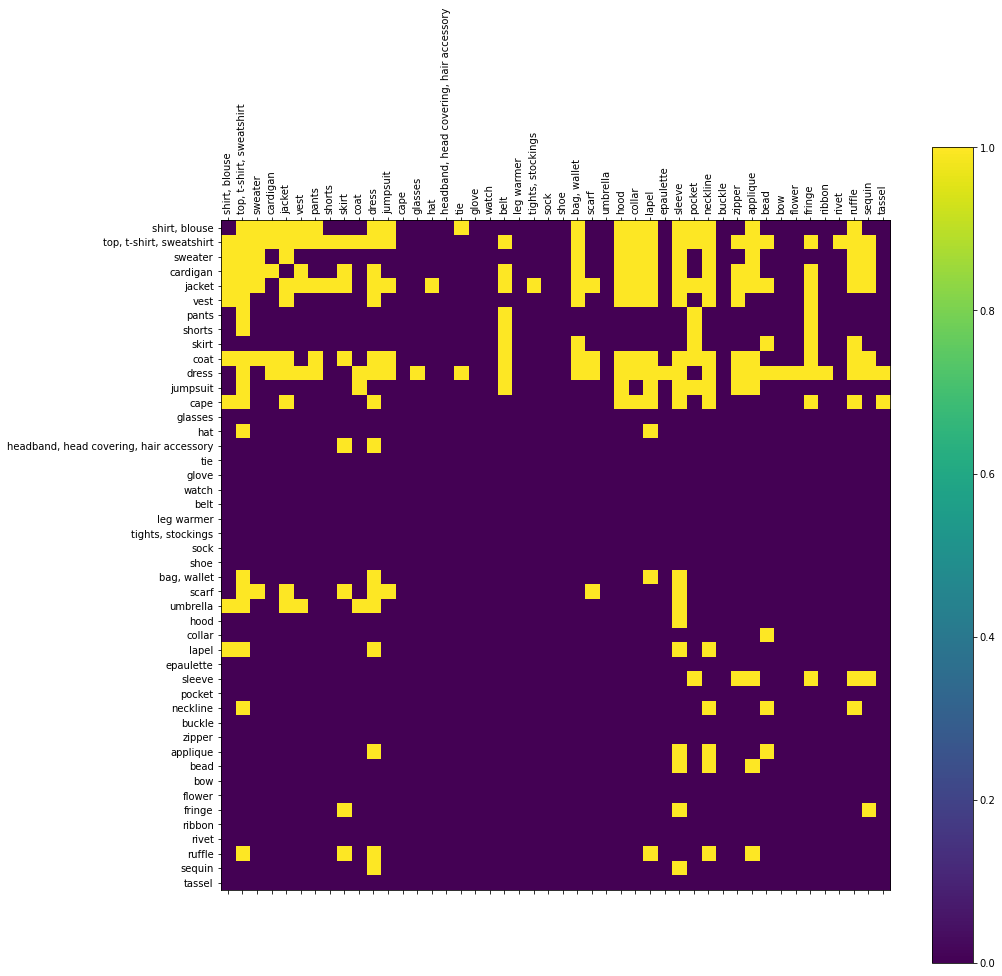

In [18]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(heat_mat, interpolation='nearest')
fig.colorbar(cax)

xaxis = np.arange(category_num)
yaxis = np.arange(category_num)
ax.set_xticks(xaxis)
ax.set_yticks(yaxis)
ax.set_xticklabels(list(names.values()), rotation=90)
ax.set_yticklabels(list(names.values()))

plt.show()

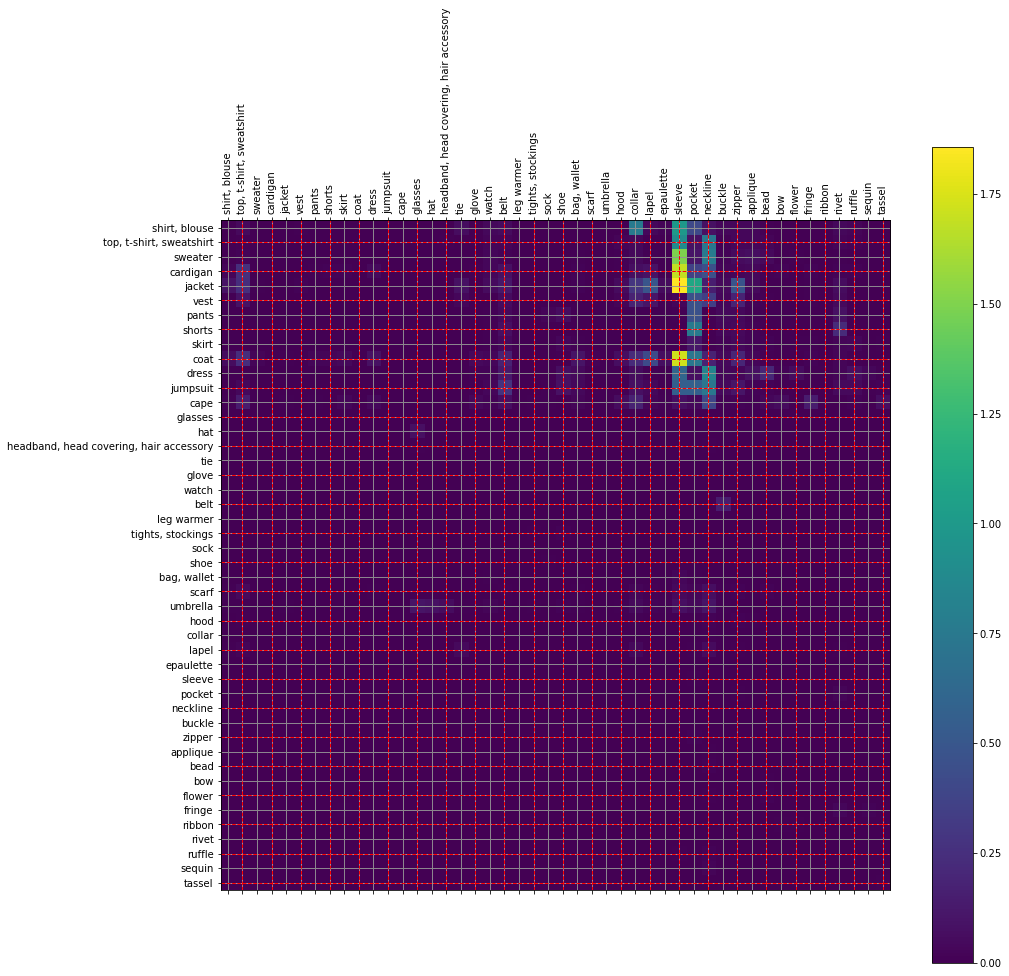

In [6]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(heat_mat, interpolation='nearest')
fig.colorbar(cax)

xaxis = np.arange(category_num)
yaxis = np.arange(category_num)
ax.set_xticks(xaxis)
ax.set_yticks(yaxis)
ax.set_xticklabels(list(names.values()), rotation=90)
ax.set_yticklabels(list(names.values()))

for xtick,ytick in zip(plt.xticks()[0],plt.yticks()[0]):
    if xtick % 2 == 0:
        plt.axvline(xtick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axvline(xtick, color='red', linestyle='--', linewidth=1, alpha=1)
    if ytick % 2 == 0:
        plt.axhline(ytick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axhline(ytick, color='red', linestyle='--', linewidth=1, alpha=1)

plt.grid()
plt.show()

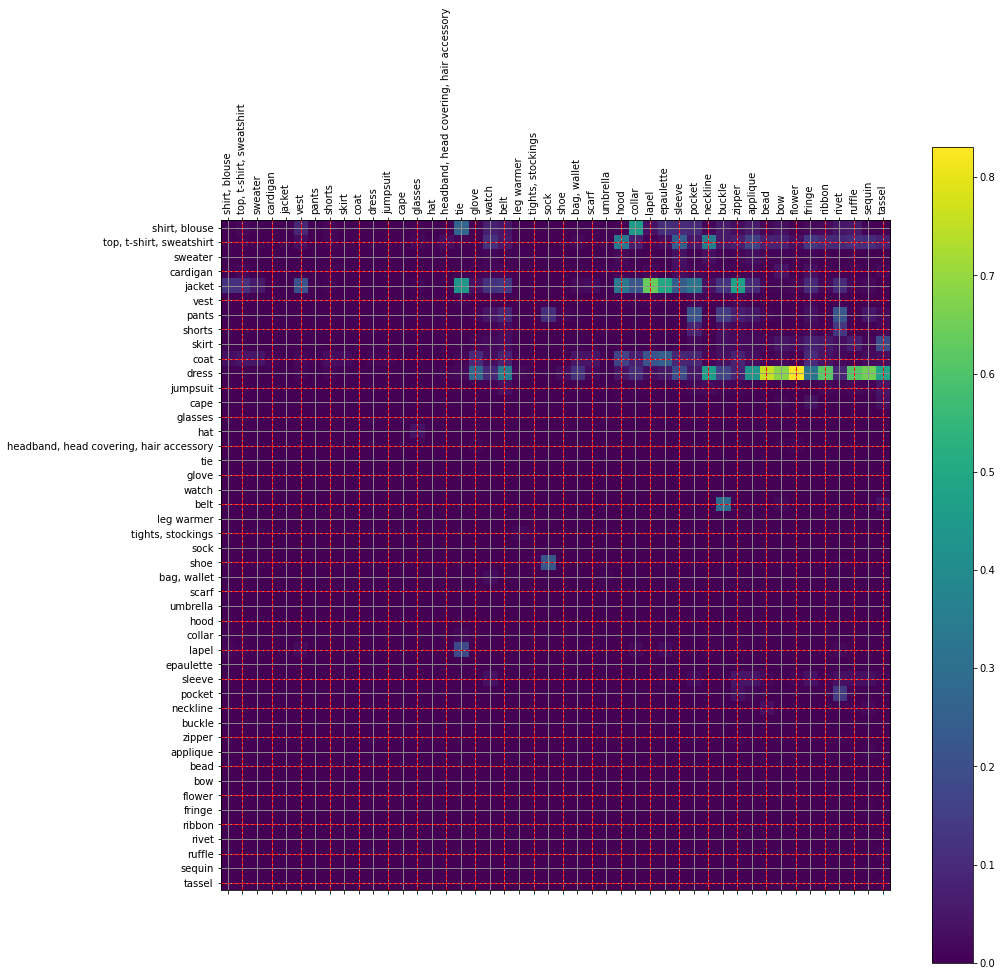

In [95]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(heat_mat, interpolation='nearest')
fig.colorbar(cax)

xaxis = np.arange(category_num)
yaxis = np.arange(category_num)
ax.set_xticks(xaxis)
ax.set_yticks(yaxis)
ax.set_xticklabels(list(names.values()), rotation=90)
ax.set_yticklabels(list(names.values()))

for xtick,ytick in zip(plt.xticks()[0],plt.yticks()[0]):
    if xtick % 2 == 0:
        plt.axvline(xtick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axvline(xtick, color='red', linestyle='--', linewidth=1, alpha=1)
    if ytick % 2 == 0:
        plt.axhline(ytick, color='gray', linestyle='-', linewidth=1, alpha=.5)
    else:
        plt.axhline(ytick, color='red', linestyle='--', linewidth=1, alpha=1)

plt.grid()
plt.show()
